In [111]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import metrics
from gtex import get_gtex_tissue, makePie
import seaborn as sns

In [112]:
df_files = pd.read_csv("files.dat", index_col=[0])

## query many

In [205]:
##GTex
level = 1
setup = 'oversigma_7tissue'
label = 'secondary_site'
directory = "/Users/filippo/Developer/tesi/gtex/hsbm/%s/"%setup
df_clusters = pd.read_csv("%s/topsbm/topsbm_level_%d_clusters.csv"%(directory, level), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 92,Cluster 93,Cluster 94,Cluster 95,Cluster 96,Cluster 97,Cluster 98,Cluster 99,Cluster 100,Cluster 101
0,GTEX-1117F-2426-SM-5EGGH,GTEX-1192X-2326-SM-5987X,GTEX-1192X-3126-SM-5N9BY,GTEX-11EM3-1026-SM-5A5KL,GTEX-139T6-1426-SM-5P9J7,GTEX-11DXX-1826-SM-5H126,GTEX-1128S-2726-SM-5H12C,GTEX-11TTK-2826-SM-5GU5K,GTEX-13CF2-1826-SM-5N9GK,GTEX-12WSN-0006-SM-5NQAP,...,GTEX-1313W-0011-R1b-SM-5,GTEX-132Q8-0011-R5a-SM-5,GTEX-12WSK-0006-SM-5NQA1,GTEX-131XW-0011-R9a-SM-5,GTEX-12WSJ-1526-SM-5GCNI,GTEX-139TT-0011-R5b-SM-5,GTEX-12ZZX-1126-SM-5EGKB,GTEX-13113-1726-SM-5GCOO,GTEX-132AR-2426-SM-5IFFD,GTEX-132Q8-0011-R7b-SM-5
1,GTEX-11DXX-1526-SM-5H115,GTEX-111YS-1926-SM-5GICC,GTEX-12WSF-3126-SM-6M478,GTEX-11I78-1726-SM-5A5M3,GTEX-111CU-1226-SM-5EGIN,GTEX-111CU-1426-SM-5GZYP,GTEX-1399T-3026-SM-5KLZC,GTEX-111FC-3326-SM-5GZYV,GTEX-11ONC-1926-SM-5GU75,GTEX-111YS-0006-SM-5NQBE,...,GTEX-12WSH-0011-R6b-SM-5,GTEX-12WSF-0011-R5a-SM-5,GTEX-131XE-0006-SM-5P9F9,GTEX-139T4-0011-R9b-SM-5,GTEX-12WSJ-1426-SM-5GCON,GTEX-1313W-0011-R4b-SM-5,GTEX-131XW-0726-SM-5EGK3,GTEX-133LE-1726-SM-5K7VQ,GTEX-139YR-1926-SM-5LZXM,NaN
2,GTEX-11P81-1626-SM-5BC52,GTEX-11EMC-2026-SM-5A5JV,GTEX-132Q8-0011-R10b-SM-,GTEX-13113-0726-SM-5LZUF,GTEX-117YX-0526-SM-5EGJH,GTEX-131XG-1826-SM-5LZV4,GTEX-12ZZZ-0011-R10a-SM-,GTEX-132Q8-2926-SM-5IFFP,GTEX-11ZVC-2126-SM-5EGJ1,GTEX-1339X-0005-SM-5O9CQ,...,GTEX-12WSD-0011-R1b-SM-5,NaN,GTEX-12WSG-0005-SM-5NQA2,GTEX-131YS-0011-R9b-SM-5,GTEX-132AR-2826-SM-5IJFV,GTEX-12ZZZ-0011-R3b-SM-5,GTEX-139T8-0826-SM-5L3DE,GTEX-1399U-1826-SM-5PNZ1,GTEX-139D8-2326-SM-5IFGE,NaN
3,GTEX-131YS-2326-SM-5IJFJ,GTEX-1117F-2826-SM-5GZXL,GTEX-131XW-3126-SM-5LZUC,GTEX-132QS-1826-SM-5IFFN,GTEX-12WSL-1626-SM-5GCMU,GTEX-11EM3-1526-SM-5A5KN,GTEX-12ZZY-3026-SM-5GCOU,GTEX-11EI6-2926-SM-5985U,GTEX-111VG-2226-SM-5N9DU,GTEX-12WSL-0005-SM-5NQAD,...,GTEX-13112-0011-R1b-SM-5,NaN,NaN,GTEX-13CIG-0011-R9a-SM-5,GTEX-1339X-1626-SM-5IJDN,GTEX-139TS-0011-R10a-SM-,GTEX-131YS-0626-SM-5EGKL,NaN,NaN,NaN
4,GTEX-1399S-2226-SM-5IFEW,NaN,GTEX-12WSF-0011-R10a-SM-,GTEX-1399R-1126-SM-5IFIO,GTEX-1399U-2226-SM-5KLZI,GTEX-12BJ1-2126-SM-5BC5O,GTEX-12ZZY-0011-R10b-SM-,GTEX-12696-3026-SM-5FQTU,GTEX-11O72-2226-SM-5PNW2,GTEX-12WSJ-0005-SM-5LU8S,...,GTEX-12WSE-0011-R1b-SM-5,NaN,NaN,GTEX-12WSH-0011-R9b-SM-5,NaN,GTEX-131YS-0011-R4a-SM-5,NaN,NaN,NaN,NaN


In [206]:
cluster={}
for i,c in enumerate(df_clusters.columns):
    cluster[i]=df_clusters[c].dropna().values

Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6


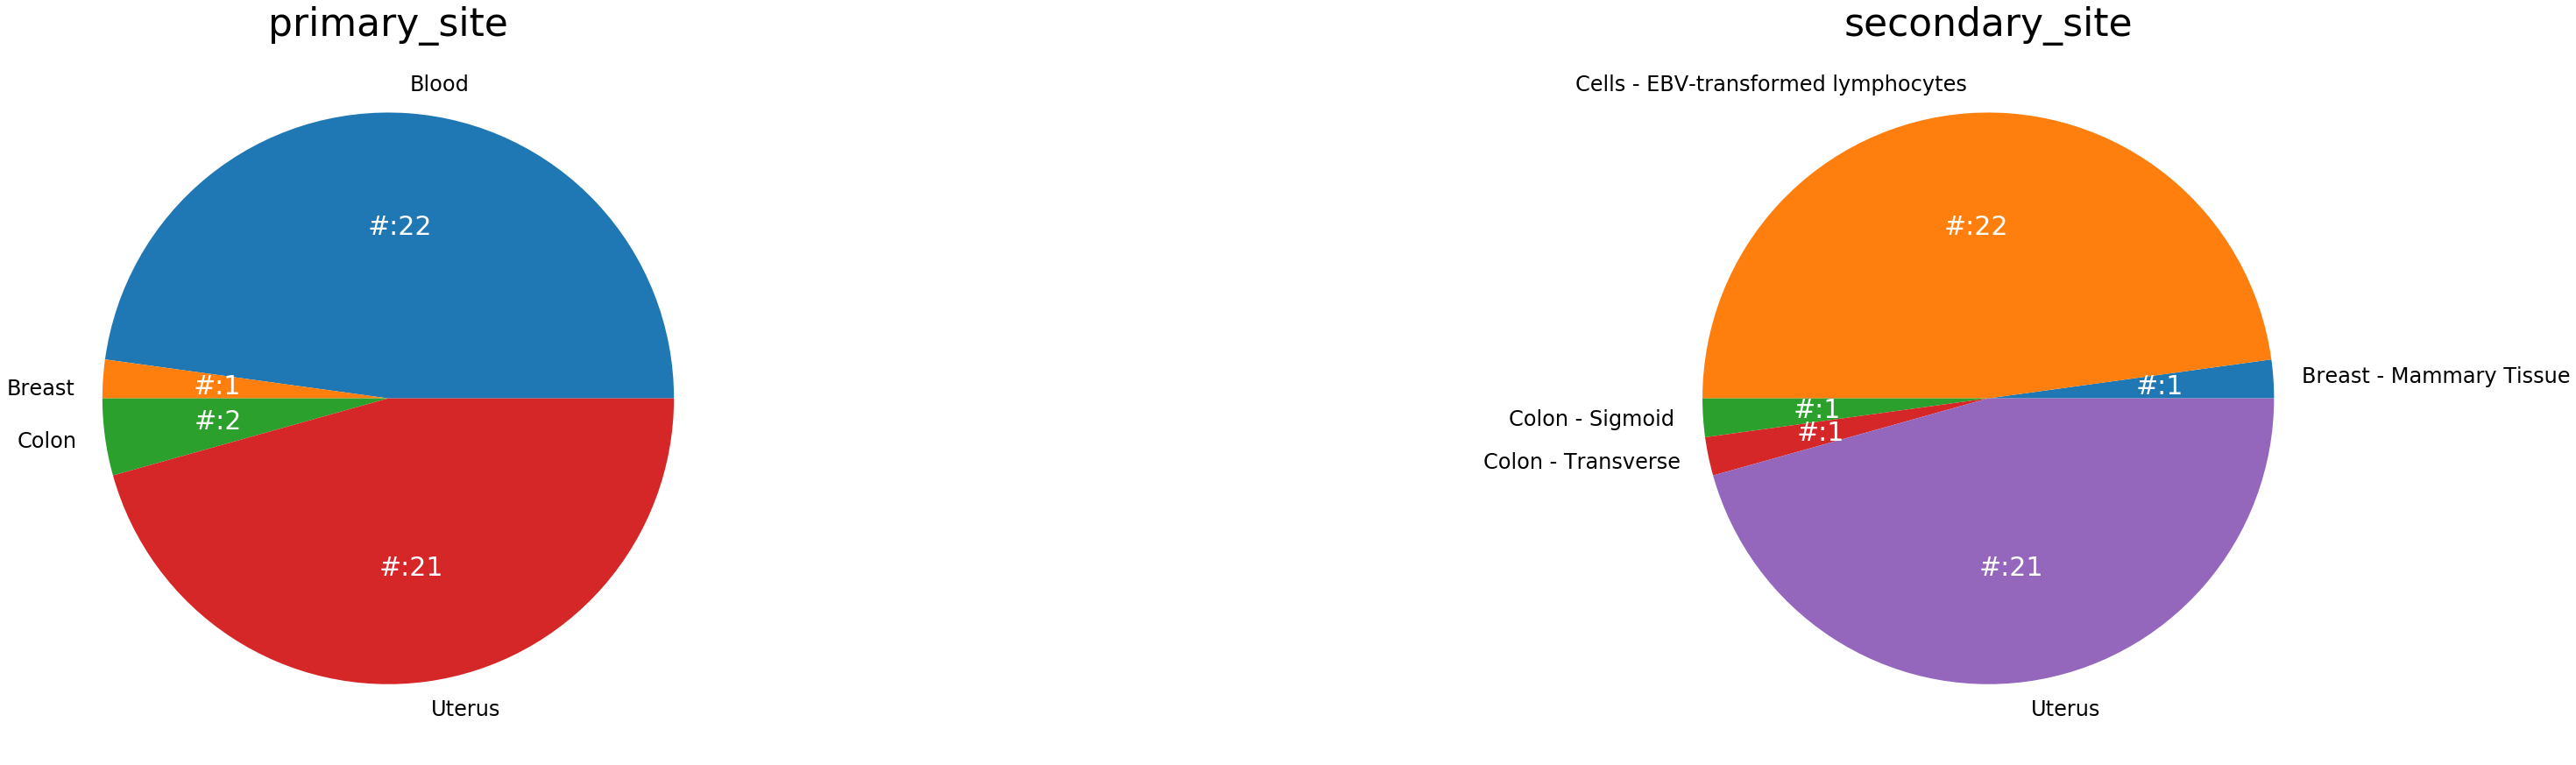

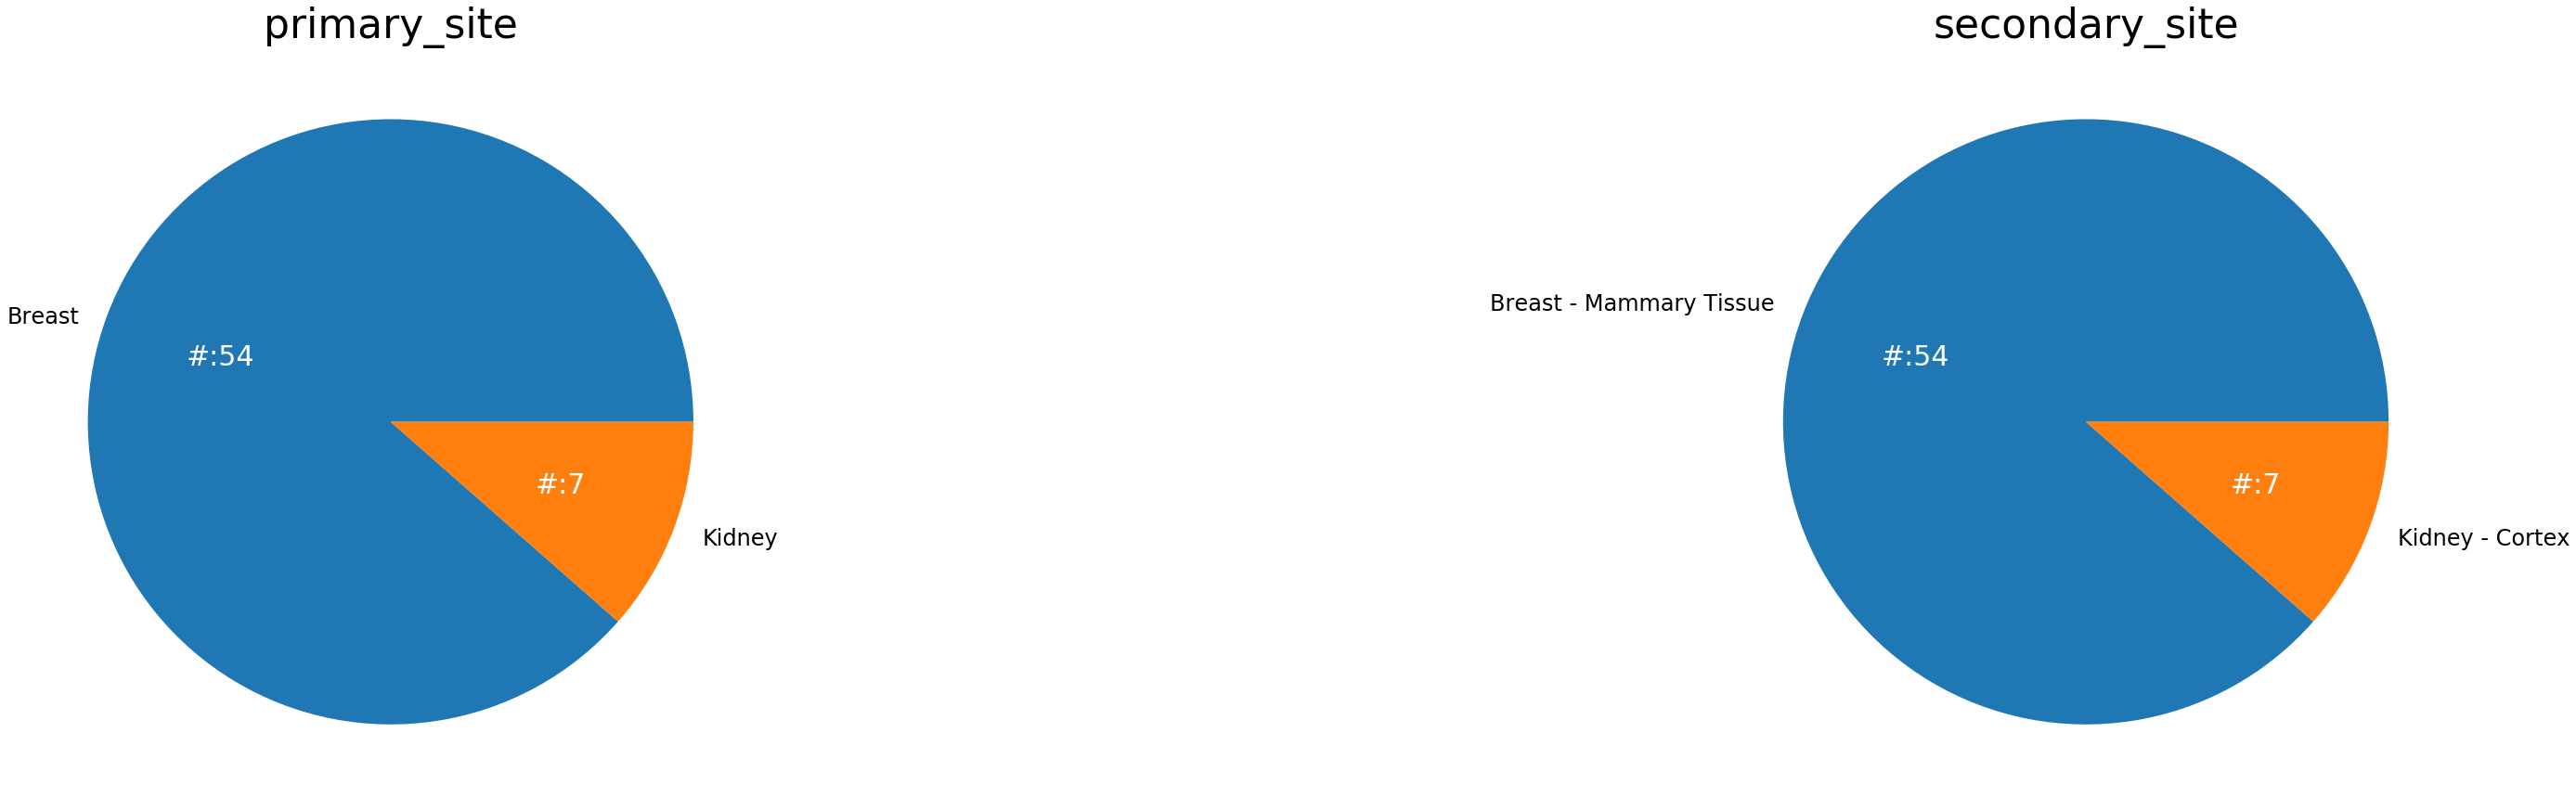

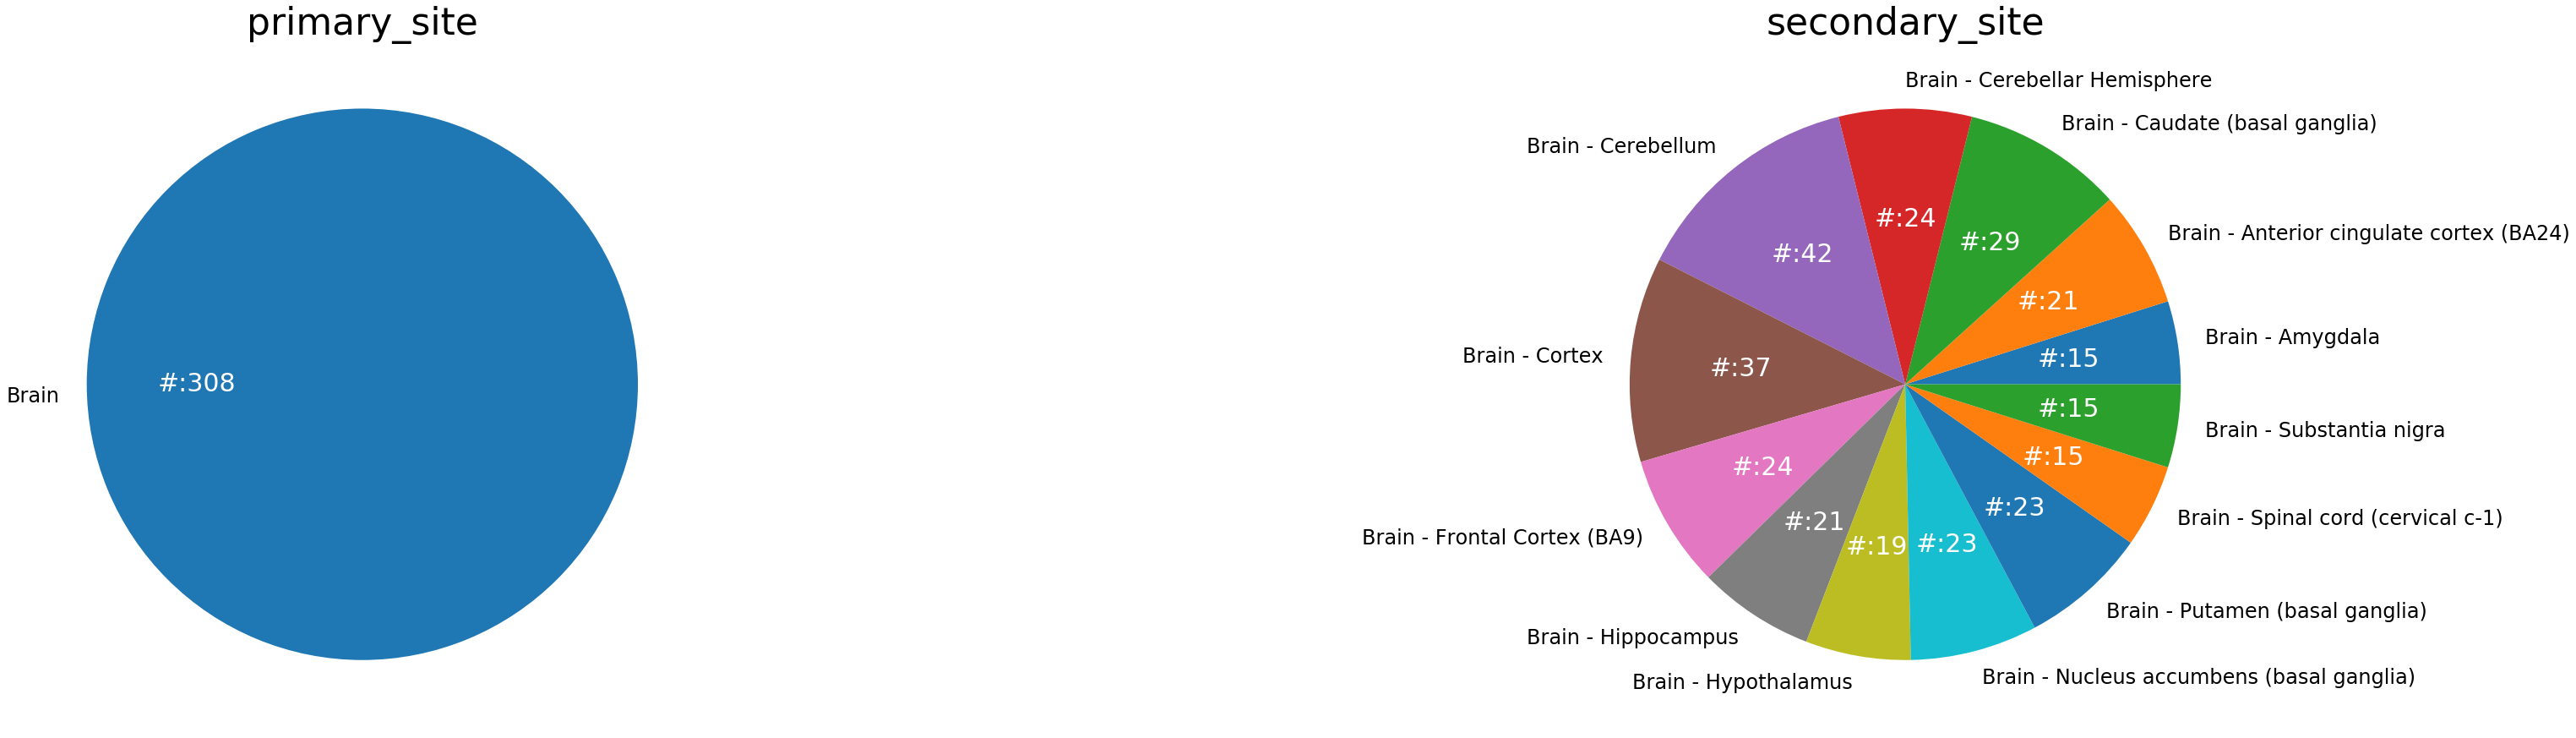

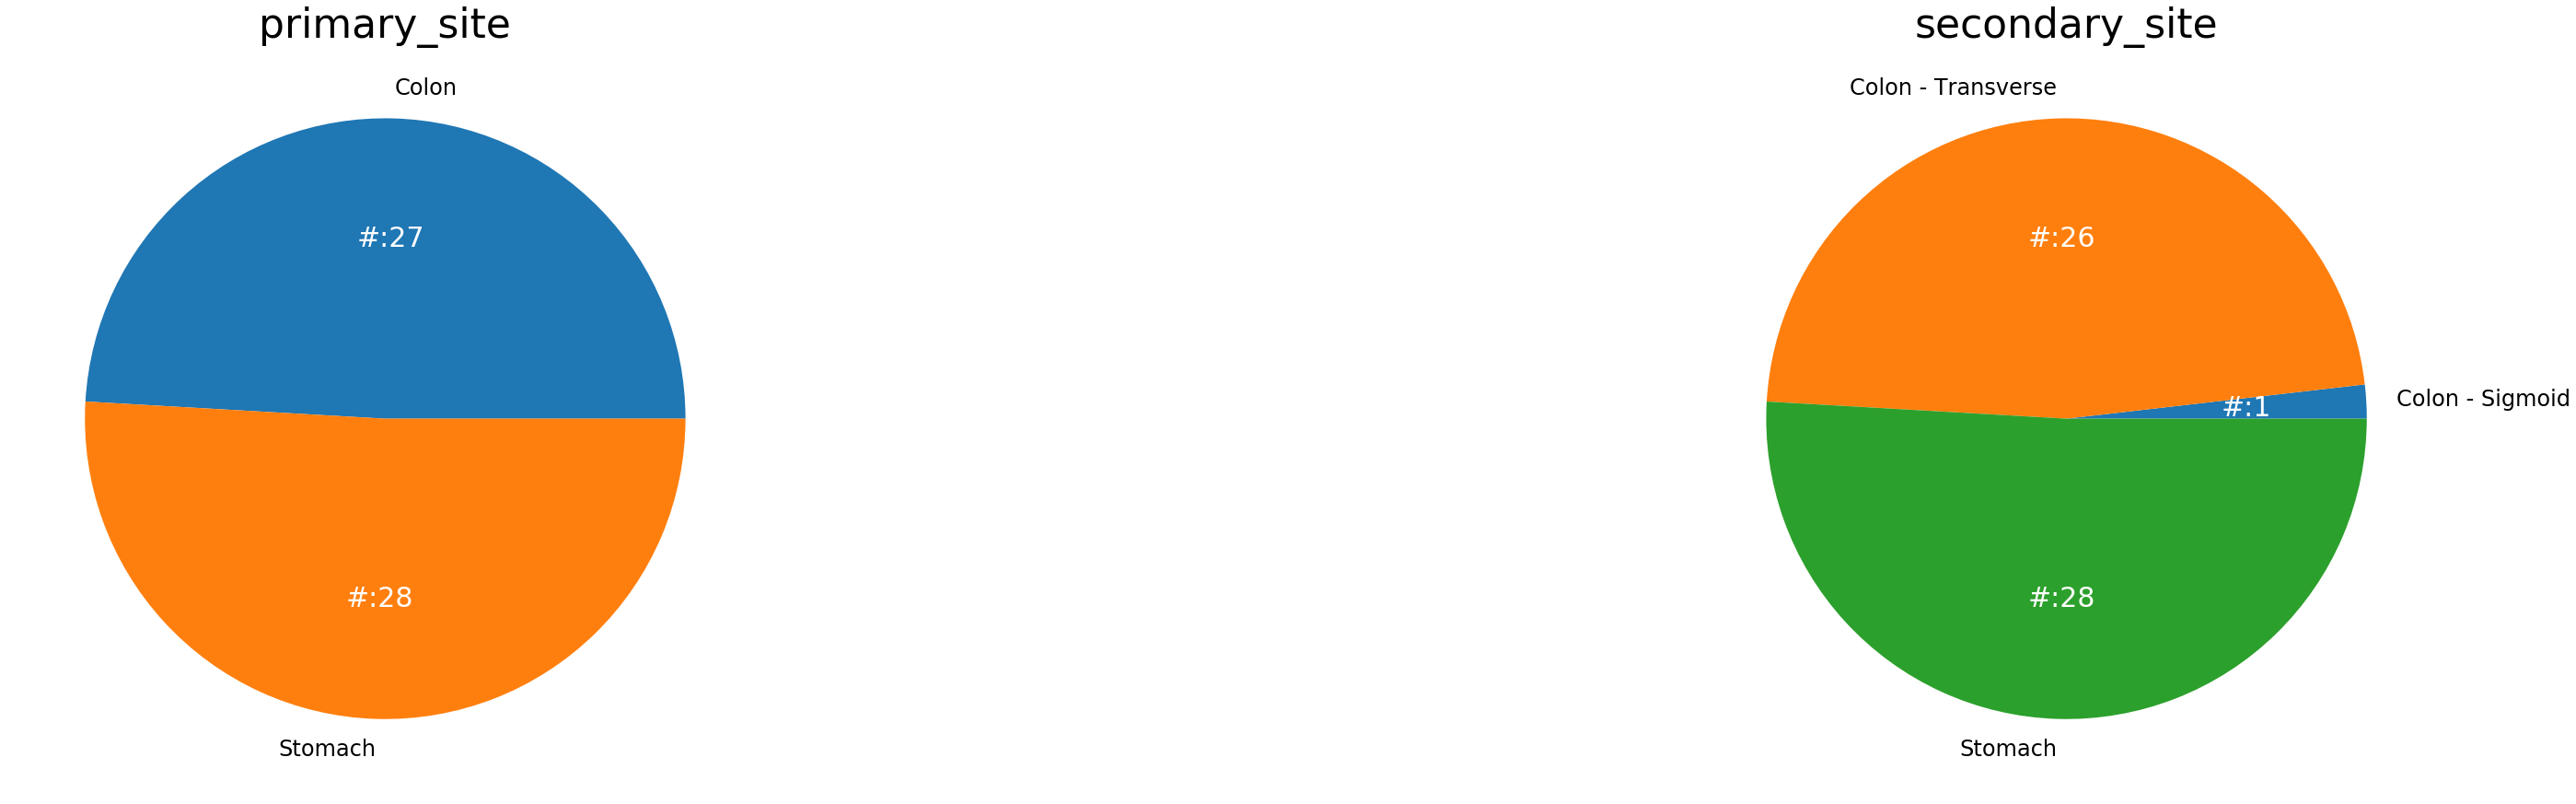

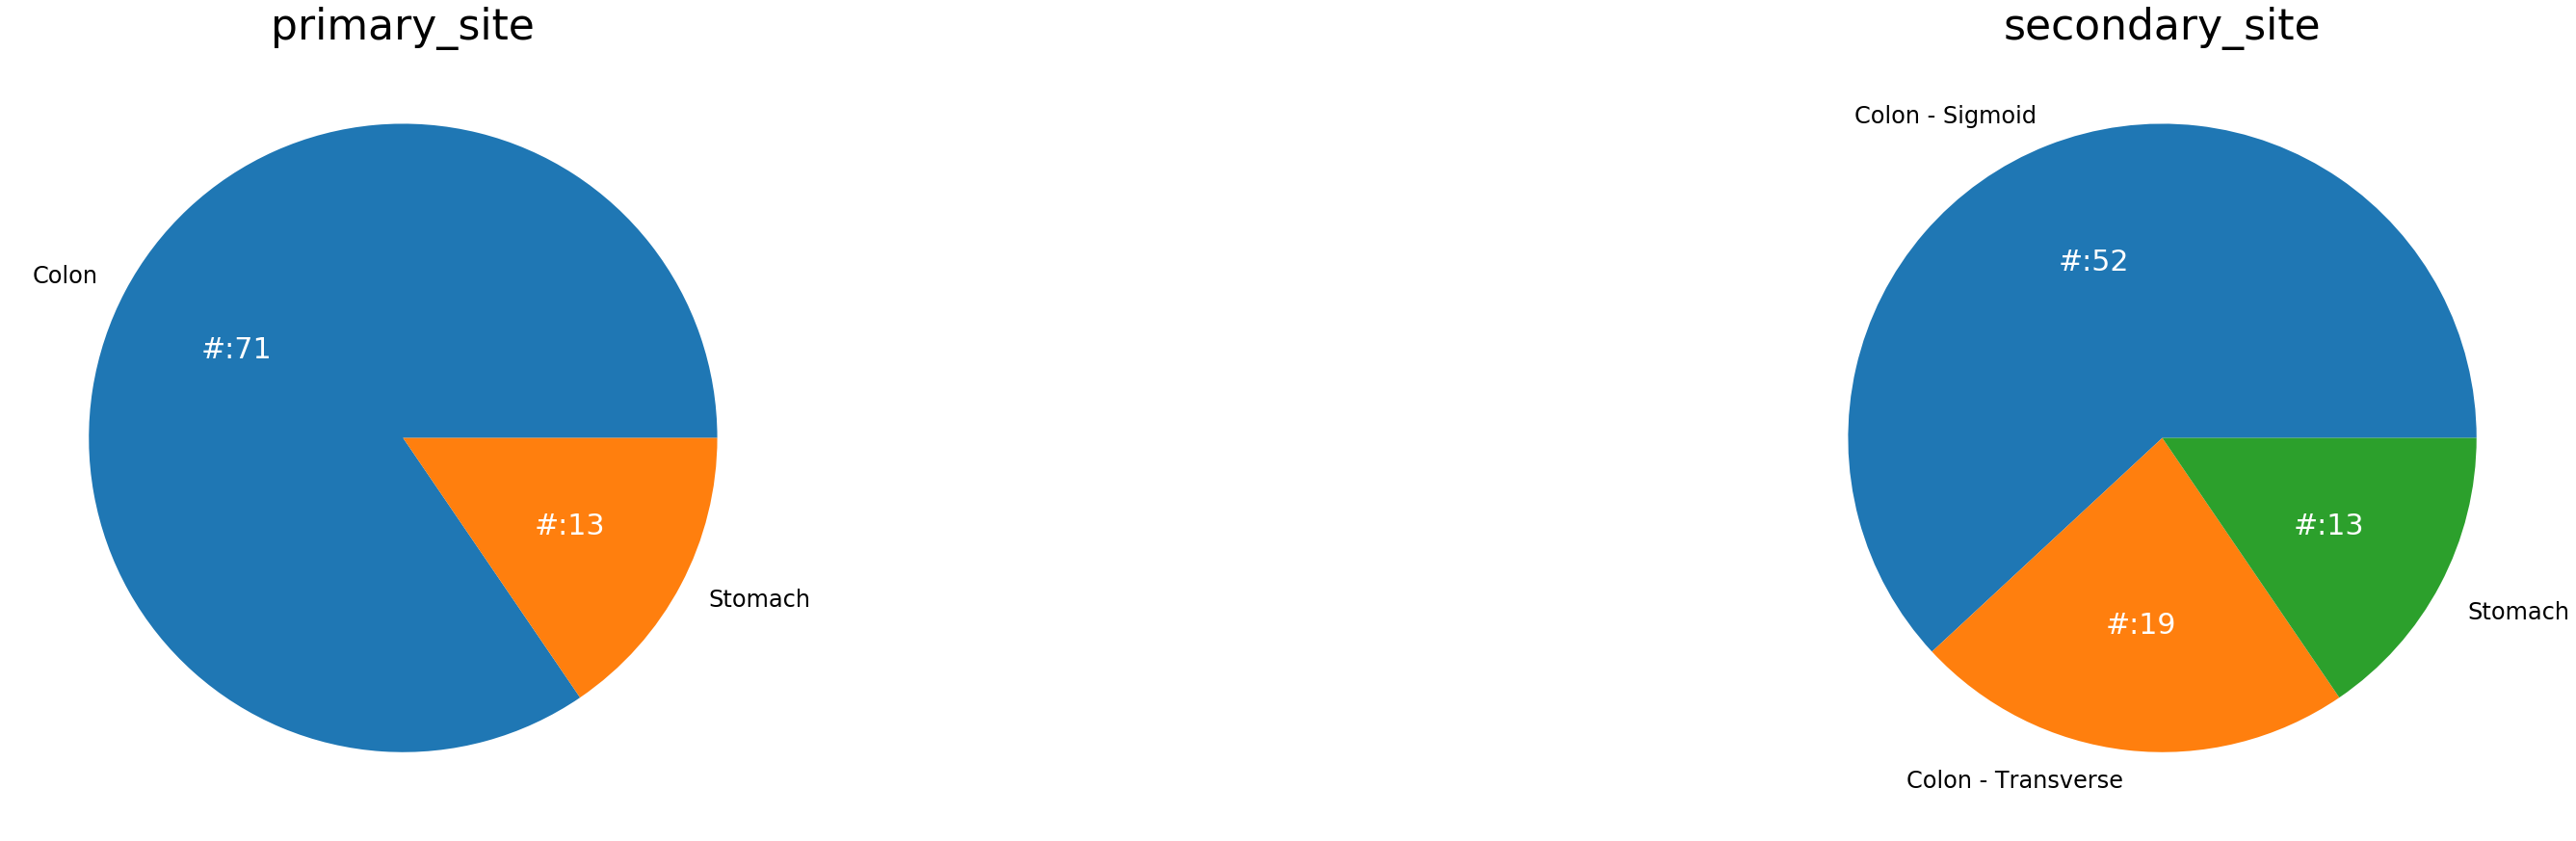

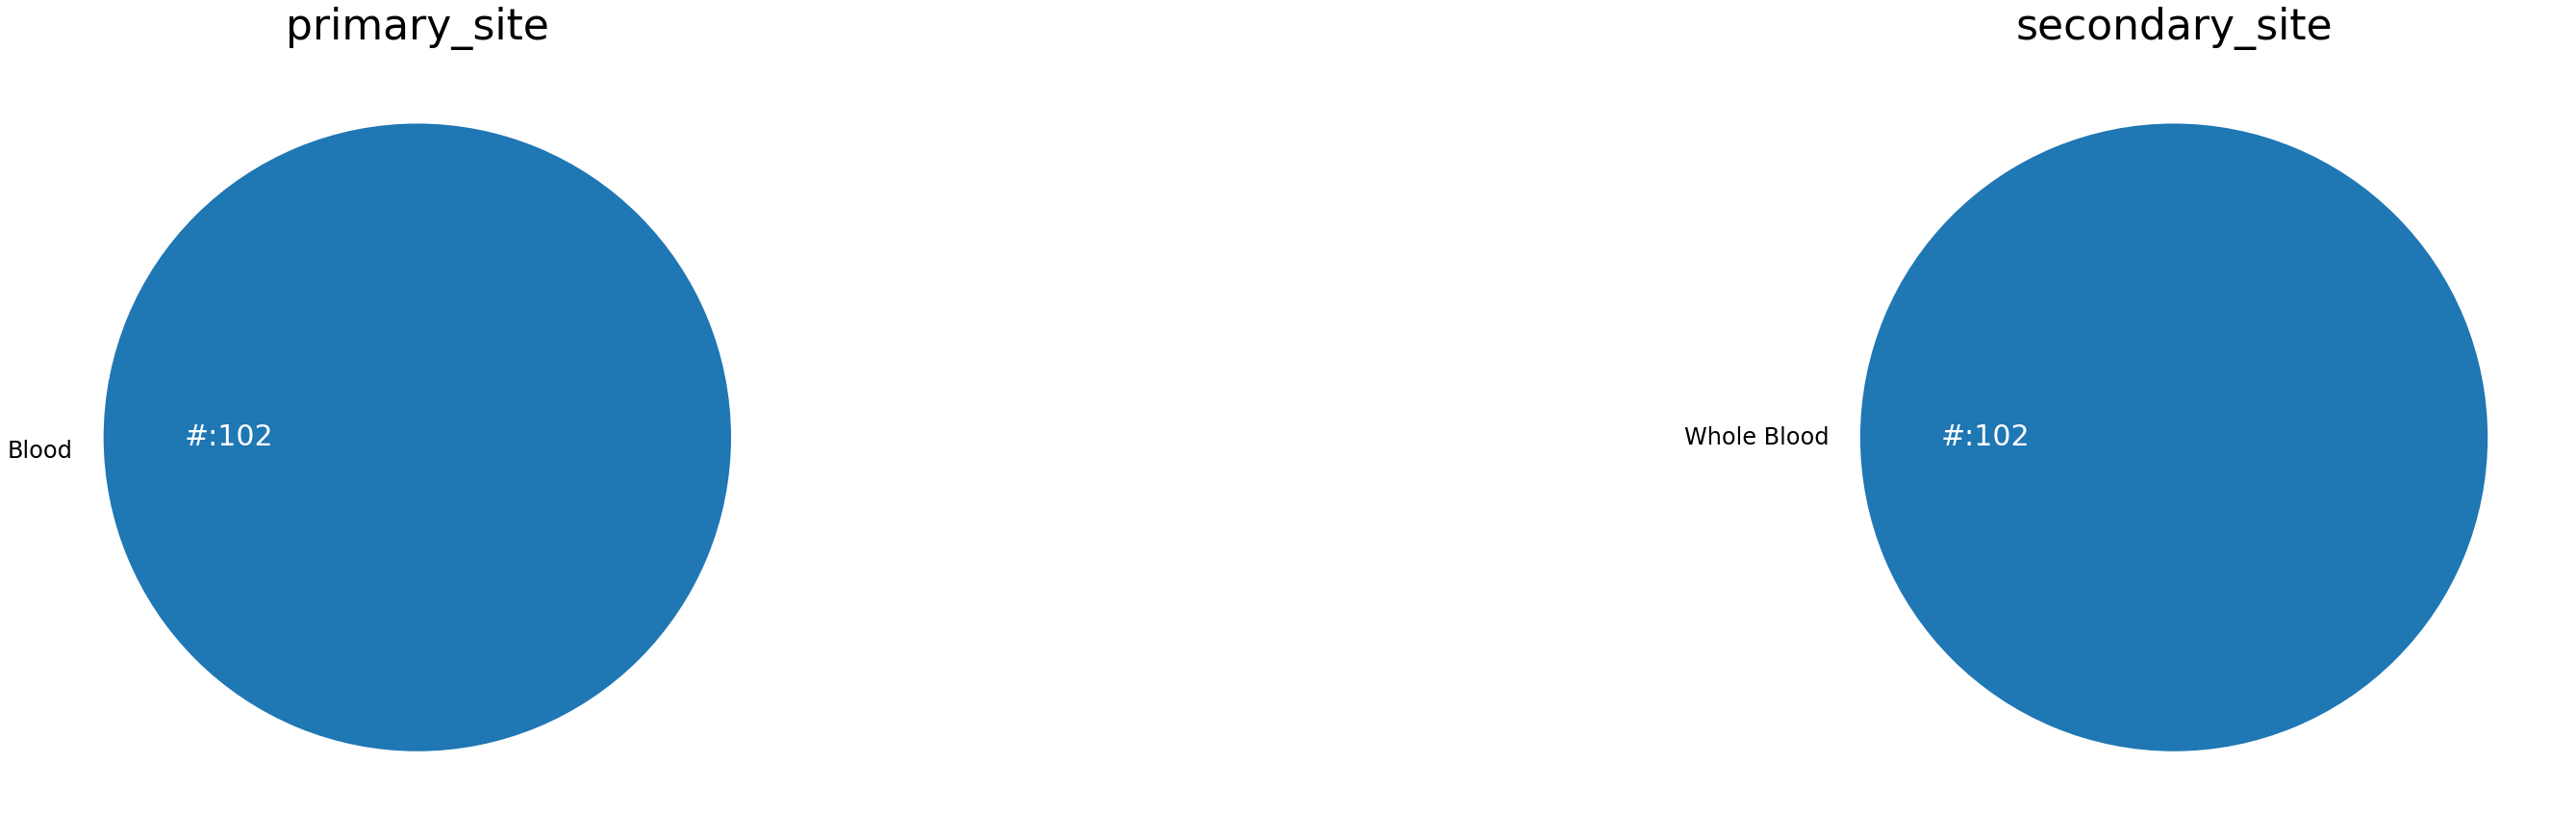

In [183]:
for i in range(len(df_clusters.columns)):
    print(df_clusters.columns[i])
    makePie(df_clusters,level,i+1)
    if i > 5:
        break

In [214]:
normalise = False

In [215]:
fraction_sites = {}
c_fraction_site = {}
for site in np.unique(df_files[label].values):
    fraction_sites[site] = []
    c_fraction_site[site] = 0

for i,c in enumerate(cluster):
    for sample in cluster[i]:
        try:
            c_fraction_site[get_gtex_tissue(sample)[label]]+=1
        except:
            print("error in %s"%sample)
    for site in fraction_sites:
        if normalise:
            norm = float(len(cluster[i]))
        else:
            norm = 1
        fraction_sites[site].append(c_fraction_site[site]/norm)
        c_fraction_site[site]=0
x = np.arange(1,1+len(df_clusters.columns))

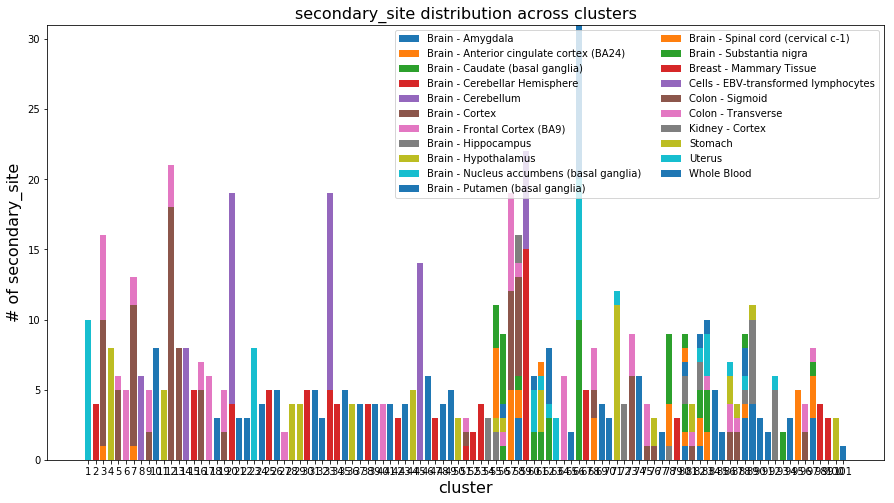

In [224]:
bottom = np.zeros(len(x))
ymax = 0
fig=plt.figure(figsize=(15,8))
for site, data in fraction_sites.items():
    if np.max(data) == 0:
        continue
    plt.bar(x,data,label=site, bottom=bottom)
    bottom=bottom+data
plt.xlabel("cluster", fontsize=16)
if normalise:
    plt.ylabel("fraction of %s"%label, fontsize=16)
else:
    plt.ylabel("# of %s"%label, fontsize=16)
plt.title("%s distribution across clusters"%label, fontsize=16)
plt.legend(ncol=2)
plt.xticks(x)
plt.show()
fig.savefig("%s/%sclustercomposition_l%d_%s.png"%(directory, "fraction_" if normalise else '', int(level),label))

In [225]:
found_classes = []
for site, data in fraction_sites.items():
    if np.max(data) == 0:
        continue
    found_classes.append(site)

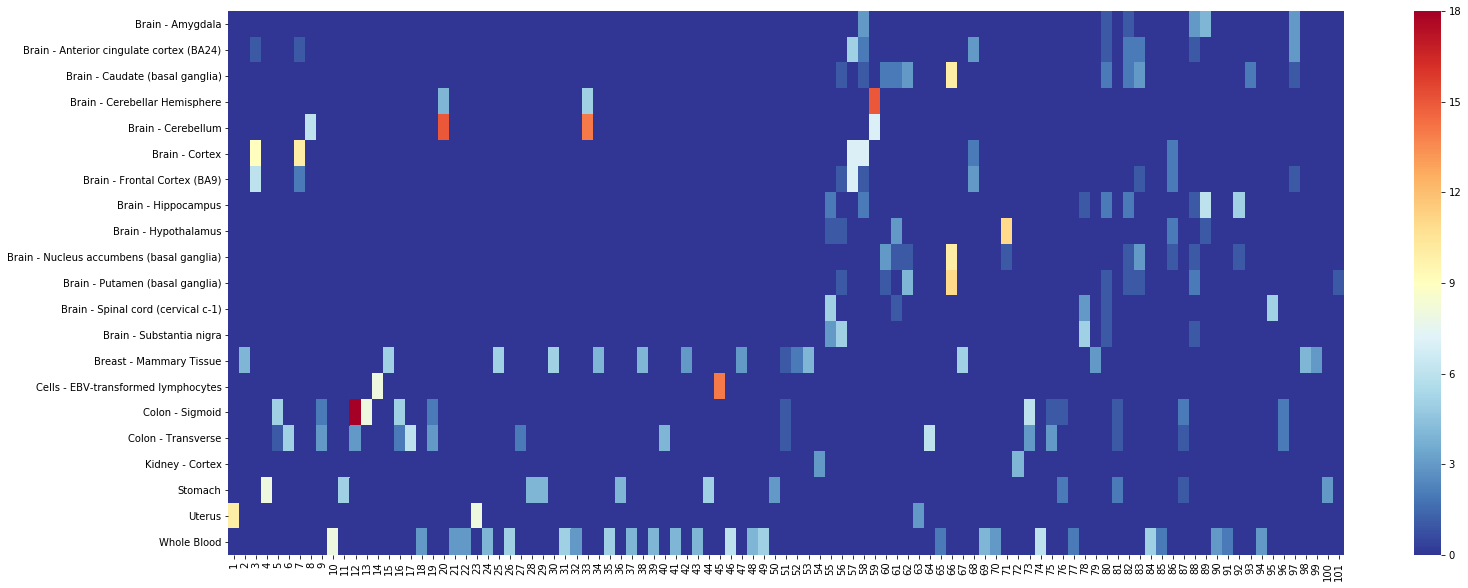

In [226]:
fig = plt.figure(figsize=(25,10))
heatmap = sns.heatmap(pd.DataFrame(data=fraction_sites).loc[:,found_classes].transpose(), vmin=0, cmap= "RdYlBu_r", xticklabels=x)
heatmap.get_figure().savefig("%sheatmap_cluster%s_l%d_%s.png"%(directory,"fraction_" if normalise else '', int(level),label))

In [212]:
maximums = []
for icluster in cluster:
    maximum = 0
    site_maximum = ''
    cumulative = 0
    for site, data in fraction_sites.items():
        cdata = data[icluster]
        cumulative += cdata
        if cdata > maximum:
            maximum = cdata
            site_maximum = site
    maximums.append([float(maximum)/cumulative,site_maximum])
    maximum=0
    cumulative=0
    site_maximum=''
maximums=np.array(maximums)

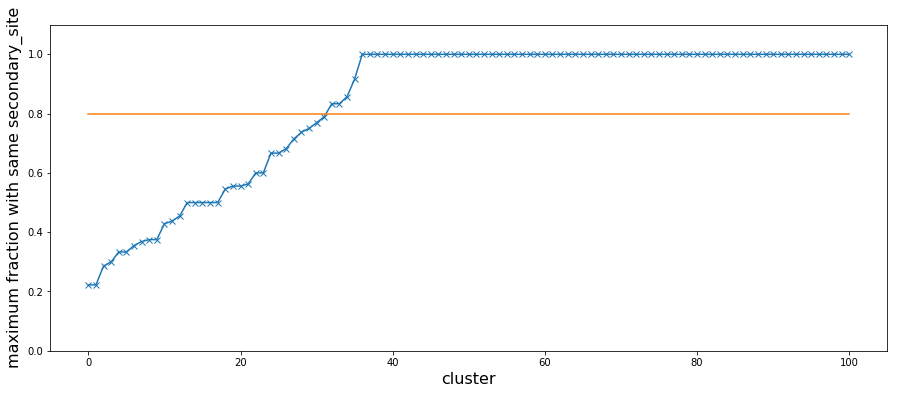

In [213]:
fig=plt.figure(figsize=(15,6))
plt.plot(np.sort(maximums[:,0].astype(float)), marker='x')
plt.plot(np.arange(len(cluster)),[0.8 for i in range(len(cluster))], visible=True)
plt.xlabel("cluster", fontsize=16)
plt.ylabel("maximum fraction with same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.show()
fig.savefig("%s_clustermaximum_l%d_%s.png"%(setup, level,label))

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [219]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(get_gtex_tissue(sample)[label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [220]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [221]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [222]:
series_metrics

MI                   0.645008
Homogeneity          0.815760
Completness          0.533366
Vmeasure             0.645008
Fowlkes-Mallows      0.253906
AdjustedRandIndex    0.174070
Name: oversigma_7tissue__level_1_secondary_site, dtype: float64

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']